In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
a = pd.DataFrame({'a': range(7),'b': range(7, 0, -1),
                  'c': ['one','one','one','two','two','two', 'two'],
                  'd': list("hjklmno")})
# print(a)
c=a.copy()
a.index=list('abcdefg')
print(c)
print(a)
b=c.reindex(list('1234567'))
print(b)

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o
   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
    a   b    c    d
1 NaN NaN  NaN  NaN
2 NaN NaN  NaN  NaN
3 NaN NaN  NaN  NaN
4 NaN NaN  NaN  NaN
5 NaN NaN  NaN  NaN
6 NaN NaN  NaN  NaN
7 NaN NaN  NaN  NaN


In [16]:
# print(pd.date_range(start='20190101',end='20190114',freq='B'))
print(pd.date_range(start='20220701',periods=10,freq='B'))
#periods是产生多少内容

DatetimeIndex(['2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14'],
              dtype='datetime64[ns]', freq='B')
0       3/11/2000
1       3/12/2000
2       3/13/2000
3       3/11/2000
4       3/12/2000
          ...    
2995    3/12/2000
2996    3/13/2000
2997    3/11/2000
2998    3/12/2000
2999    3/13/2000
Length: 3000, dtype: object


In [18]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 1000)
print(s)
%timeit pd.to_datetime(s,infer_datetime_format=True)

0       3/11/2000
1       3/12/2000
2       3/13/2000
3       3/11/2000
4       3/12/2000
          ...    
2995    3/12/2000
2996    3/13/2000
2997    3/11/2000
2998    3/12/2000
2999    3/13/2000
Length: 3000, dtype: object
3.66 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

       zip                   title            timeStamp          twp  \
0  19525.0  EMS: BACK PAINS/INJURY  2015-12-10 17:10:52  NEW HANOVER   

                     addr  e  
0  REINDEER CT & DEAD END  1  


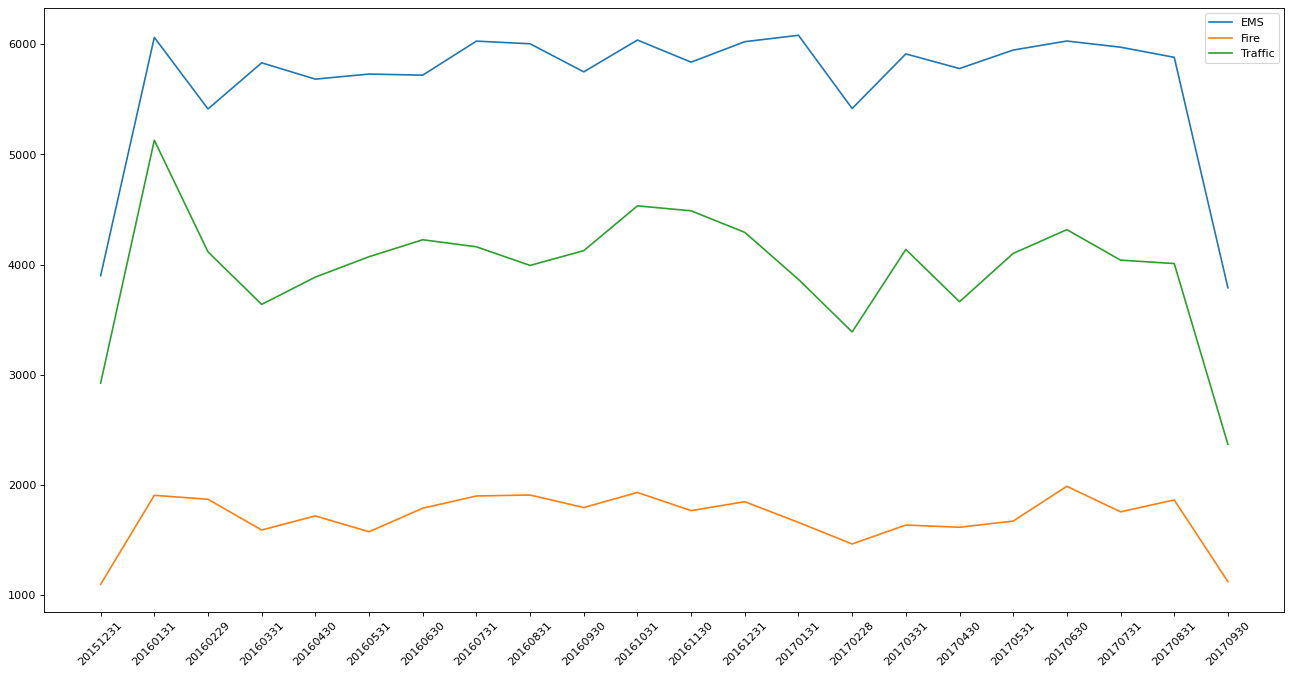

In [40]:
df=pd.read_csv('./911.csv')
print(df.head(1))
# print(df.info())
df['timeStamp']=pd.to_datetime(df['timeStamp'])
title_list=df['title'].str.split(': ').tolist()
#df['title']是series,要加str
cate_list=[i[0] for i in title_list]
df['cate']=pd.DataFrame(np.array(cate_list).reshape(df.shape[0],1))

df.set_index('timeStamp',inplace=True)
#将timeStamp设成index
plt.figure(figsize=(20,10),dpi=80)
for group_name,group_data in df.groupby(by='cate'):
    #索引必须是时间戳，参数和时间戳的很像，M代表月
    count_by_month=group_data.resample('M').count()['title']
    # print(count_by_month)
    _x=count_by_month.index
    _x=[i.strftime("%Y%m%d") for i in _x]
    plt.plot(_x,count_by_month.values,label=group_name)
plt.xticks(range(len(_x)),_x,rotation=45)
plt.legend(loc='best')
plt.show()

               No    year  month   day  hour  season  PM_Dongsi  \
datetime                                                          
2010-01-01   84.5  2010.0    1.0   4.0  11.5     4.0        NaN   
2010-01-08  252.5  2010.0    1.0  11.0  11.5     4.0        NaN   

            PM_Dongsihuan  PM_Nongzhanguan  PM_US Post       DEWP       HUMI  \
datetime                                                                       
2010-01-01            NaN              NaN   71.627586 -18.255952  54.395833   
2010-01-08            NaN              NaN   69.910714 -19.035714  49.386905   

                   PRES       TEMP        Iws  precipitation     Iprec  
datetime                                                                
2010-01-01  1027.910714 -10.202381  43.859821       0.066667  0.786905  
2010-01-08  1030.035714 -10.029762  45.392083       0.000000  0.000000  


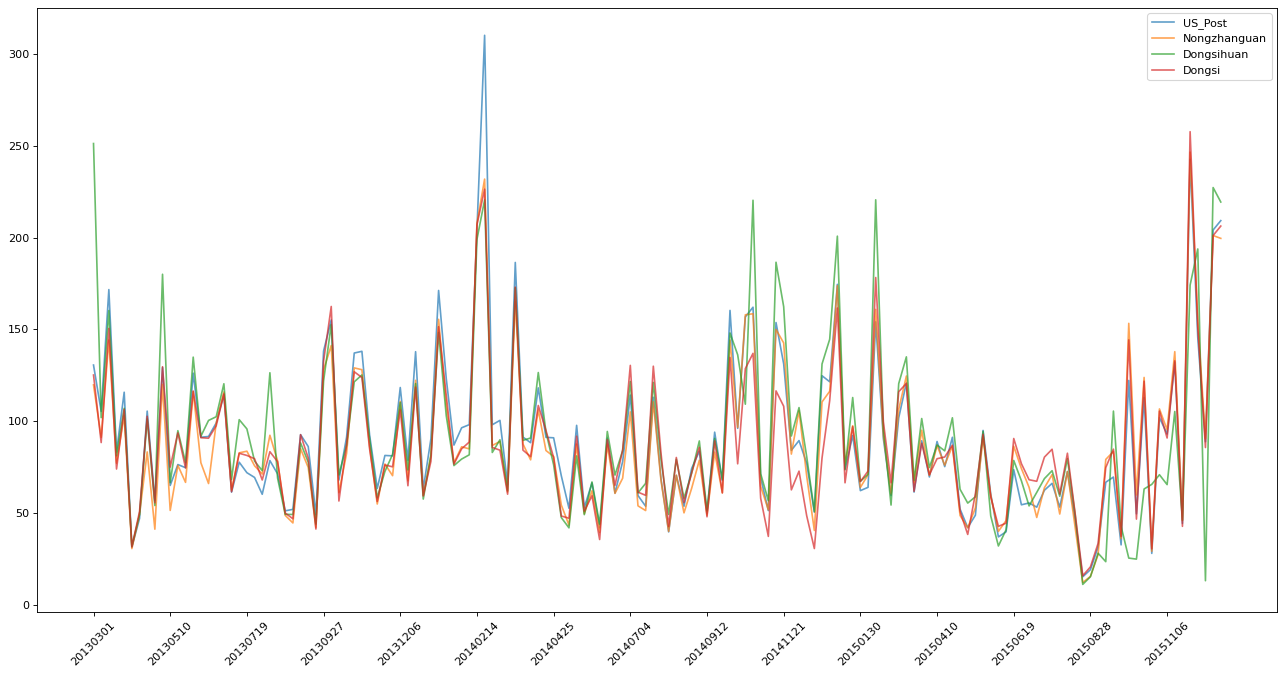

In [52]:
file_path='./BeijingPM20100101_20151231.csv'
df=pd.read_csv(file_path)
# print(df.head(1))
# print(df.info())
period=pd.PeriodIndex(year=df['year'],month=df['month'],
                      day=df['day'],hour=df['hour'],freq='H')
df['datetime']=period
# print(df.head(1))
df.set_index('datetime',inplace=True)
df=df.resample('7D').mean()
print(df.head(2))
# print(df.iloc[312])
df=df.loc[:,["PM_US Post","PM_Nongzhanguan","PM_Dongsihuan","PM_Dongsi"]]
df=df.dropna()
PM_US_Post_data=df.loc[:,"PM_US Post"]
PM_Nongzhanguan_data=df.loc[:,"PM_Nongzhanguan"]
PM_Dongsihuan_data=df.loc[:,"PM_Dongsihuan"]
PM_Dongsi_data=df.loc[:,"PM_Dongsi"]
x=PM_Dongsi_data.index
x=[i.strftime("%Y%m%d") for i in x]
plt.figure(figsize=(20,10),dpi=80)
plt.plot(range(len(x)),PM_US_Post_data.values,label='US_Post', alpha=0.7)
plt.plot(range(len(x)),PM_Nongzhanguan_data.values,label='Nongzhanguan', alpha=0.7)
plt.plot(range(len(x)),PM_Dongsihuan_data.values,label='Dongsihuan', alpha=0.7)
plt.plot(range(len(x)),PM_Dongsi_data.values,label='Dongsi', alpha=0.7)
plt.legend(loc='best')
plt.xticks(range(0, len(x), 10), x[::10], rotation=45)
plt.show()